Kernal: scvelo_024

# Set up

In [1]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
import scvelo as scv

/tmp/ipykernel_4160638/480886881.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()

scv.settings.verbosity = 3
scv.logging.print_version()

-----
anndata     0.10.5.post1
scanpy      1.9.8
-----
PIL                 10.2.0
absl                NA
asciitree           NA
asttokens           NA
attr                23.2.0
backcall            0.2.0
chex                0.1.85
comm                0.2.1
contextlib2         NA
cycler              0.12.1
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
defusedxml          0.7.1
docrep              0.3.2
etils               1.5.2
exceptiongroup      1.2.0
executing           0.8.3
flax                0.8.1
fsspec              2024.2.0
h5py                3.10.0
igraph              0.10.8
importlib_resources NA
ipykernel           6.28.0
ipywidgets          8.1.2
jax                 0.4.24
jaxlib              0.4.24
jedi                0.18.1
joblib              1.3.2
kiwisolver          1.4.5
leidenalg           0.10.2
lightning           2.1.4
lightning_utilities 0.10.1
llvmlite            0.42.0
louvain             0.8.1
matplotlib 

In [3]:
scv.settings.set_figure_params('scvelo')

set working dir and output path

In [4]:
cell = "cDC2_tDC"
vdata = sc.read(f'/work/home/project/scESCA/200227_6samples/output/04.rm_cells/seurat_{cell}.scvelo.h5ad')
vdata

AnnData object with n_obs × n_vars = 2614 × 2000
    obs: 'seurat_clusters', 'level_2', 'level_3', 'Tissue', 'Origin', 'Origin2_n', 'Origin3', 'Origin4', 'Metastatic', 'Patient', 'Source', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'Origin2_n_colors', 'Origin3_colors', 'Origin4_colors', 'Patient_colors', 'Tissue_colors', 'level_2_colors', 'level_3_colors', 'neighbors', 'pca', 'seurat_clusters_colors', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'spliced', 'unspliced', 'variance_velocity', 'velocity'
    obsp: 'connectivities', 'dis

# stochastic model

In [5]:
model = "stochastic"

In [6]:
# compute velocity and velocity graph
vdata._isview = False # this is a bug in the scvelo package
scv.tl.velocity(vdata)
scv.tl.velocity_graph(vdata)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/64 cores)


  0%|          | 0/2614 [00:00<?, ?cells/s]

    finished (0:00:05) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_cDC2_tDC.scvelo_stochastic.on_grid.pdf


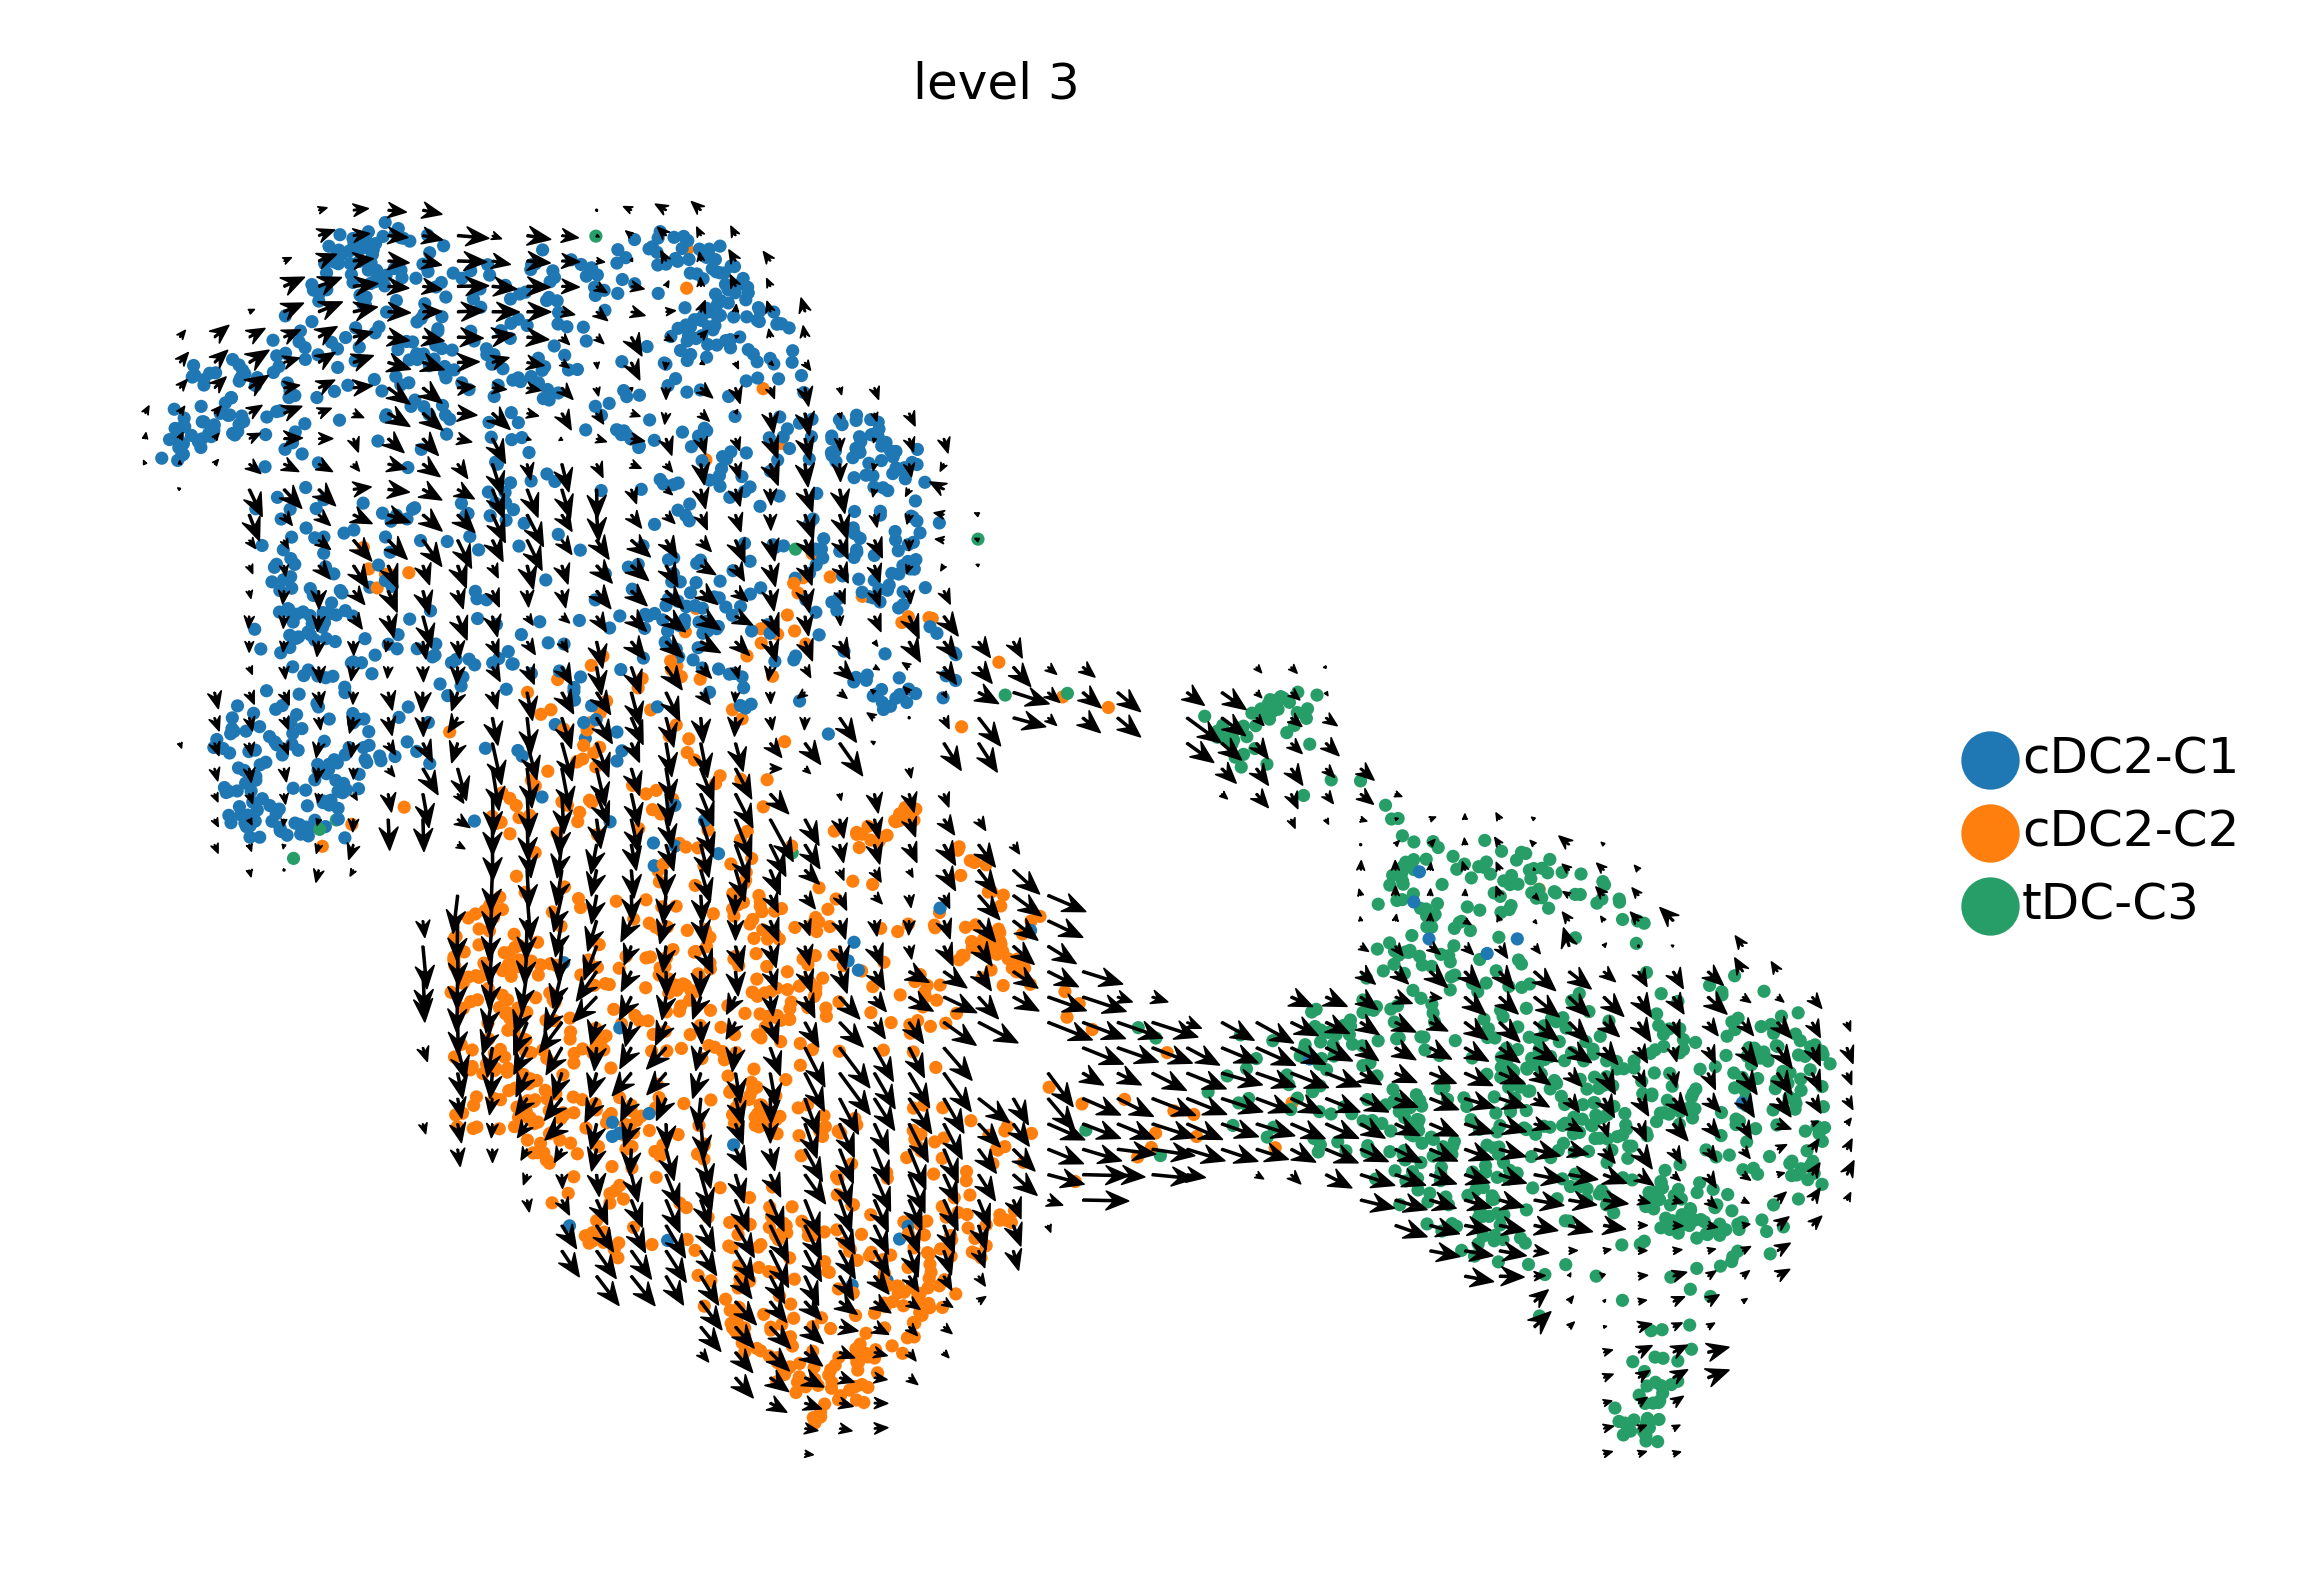

In [7]:
scv.pl.velocity_embedding_grid(vdata, basis='umap', color=['level_3'], arrow_size=2, arrow_length=2, arrow_color='black', legend_loc='right',
                              figsize=(4, 3), alpha=1, dpi=300, fontsize=6, legend_fontsize=6, size = 10, save=f"{cell}.scvelo_{model}.on_grid.pdf")

saving figure to file ./figures/scvelo_cDC2_tDC.scvelo_stochastic.on_stream.pdf


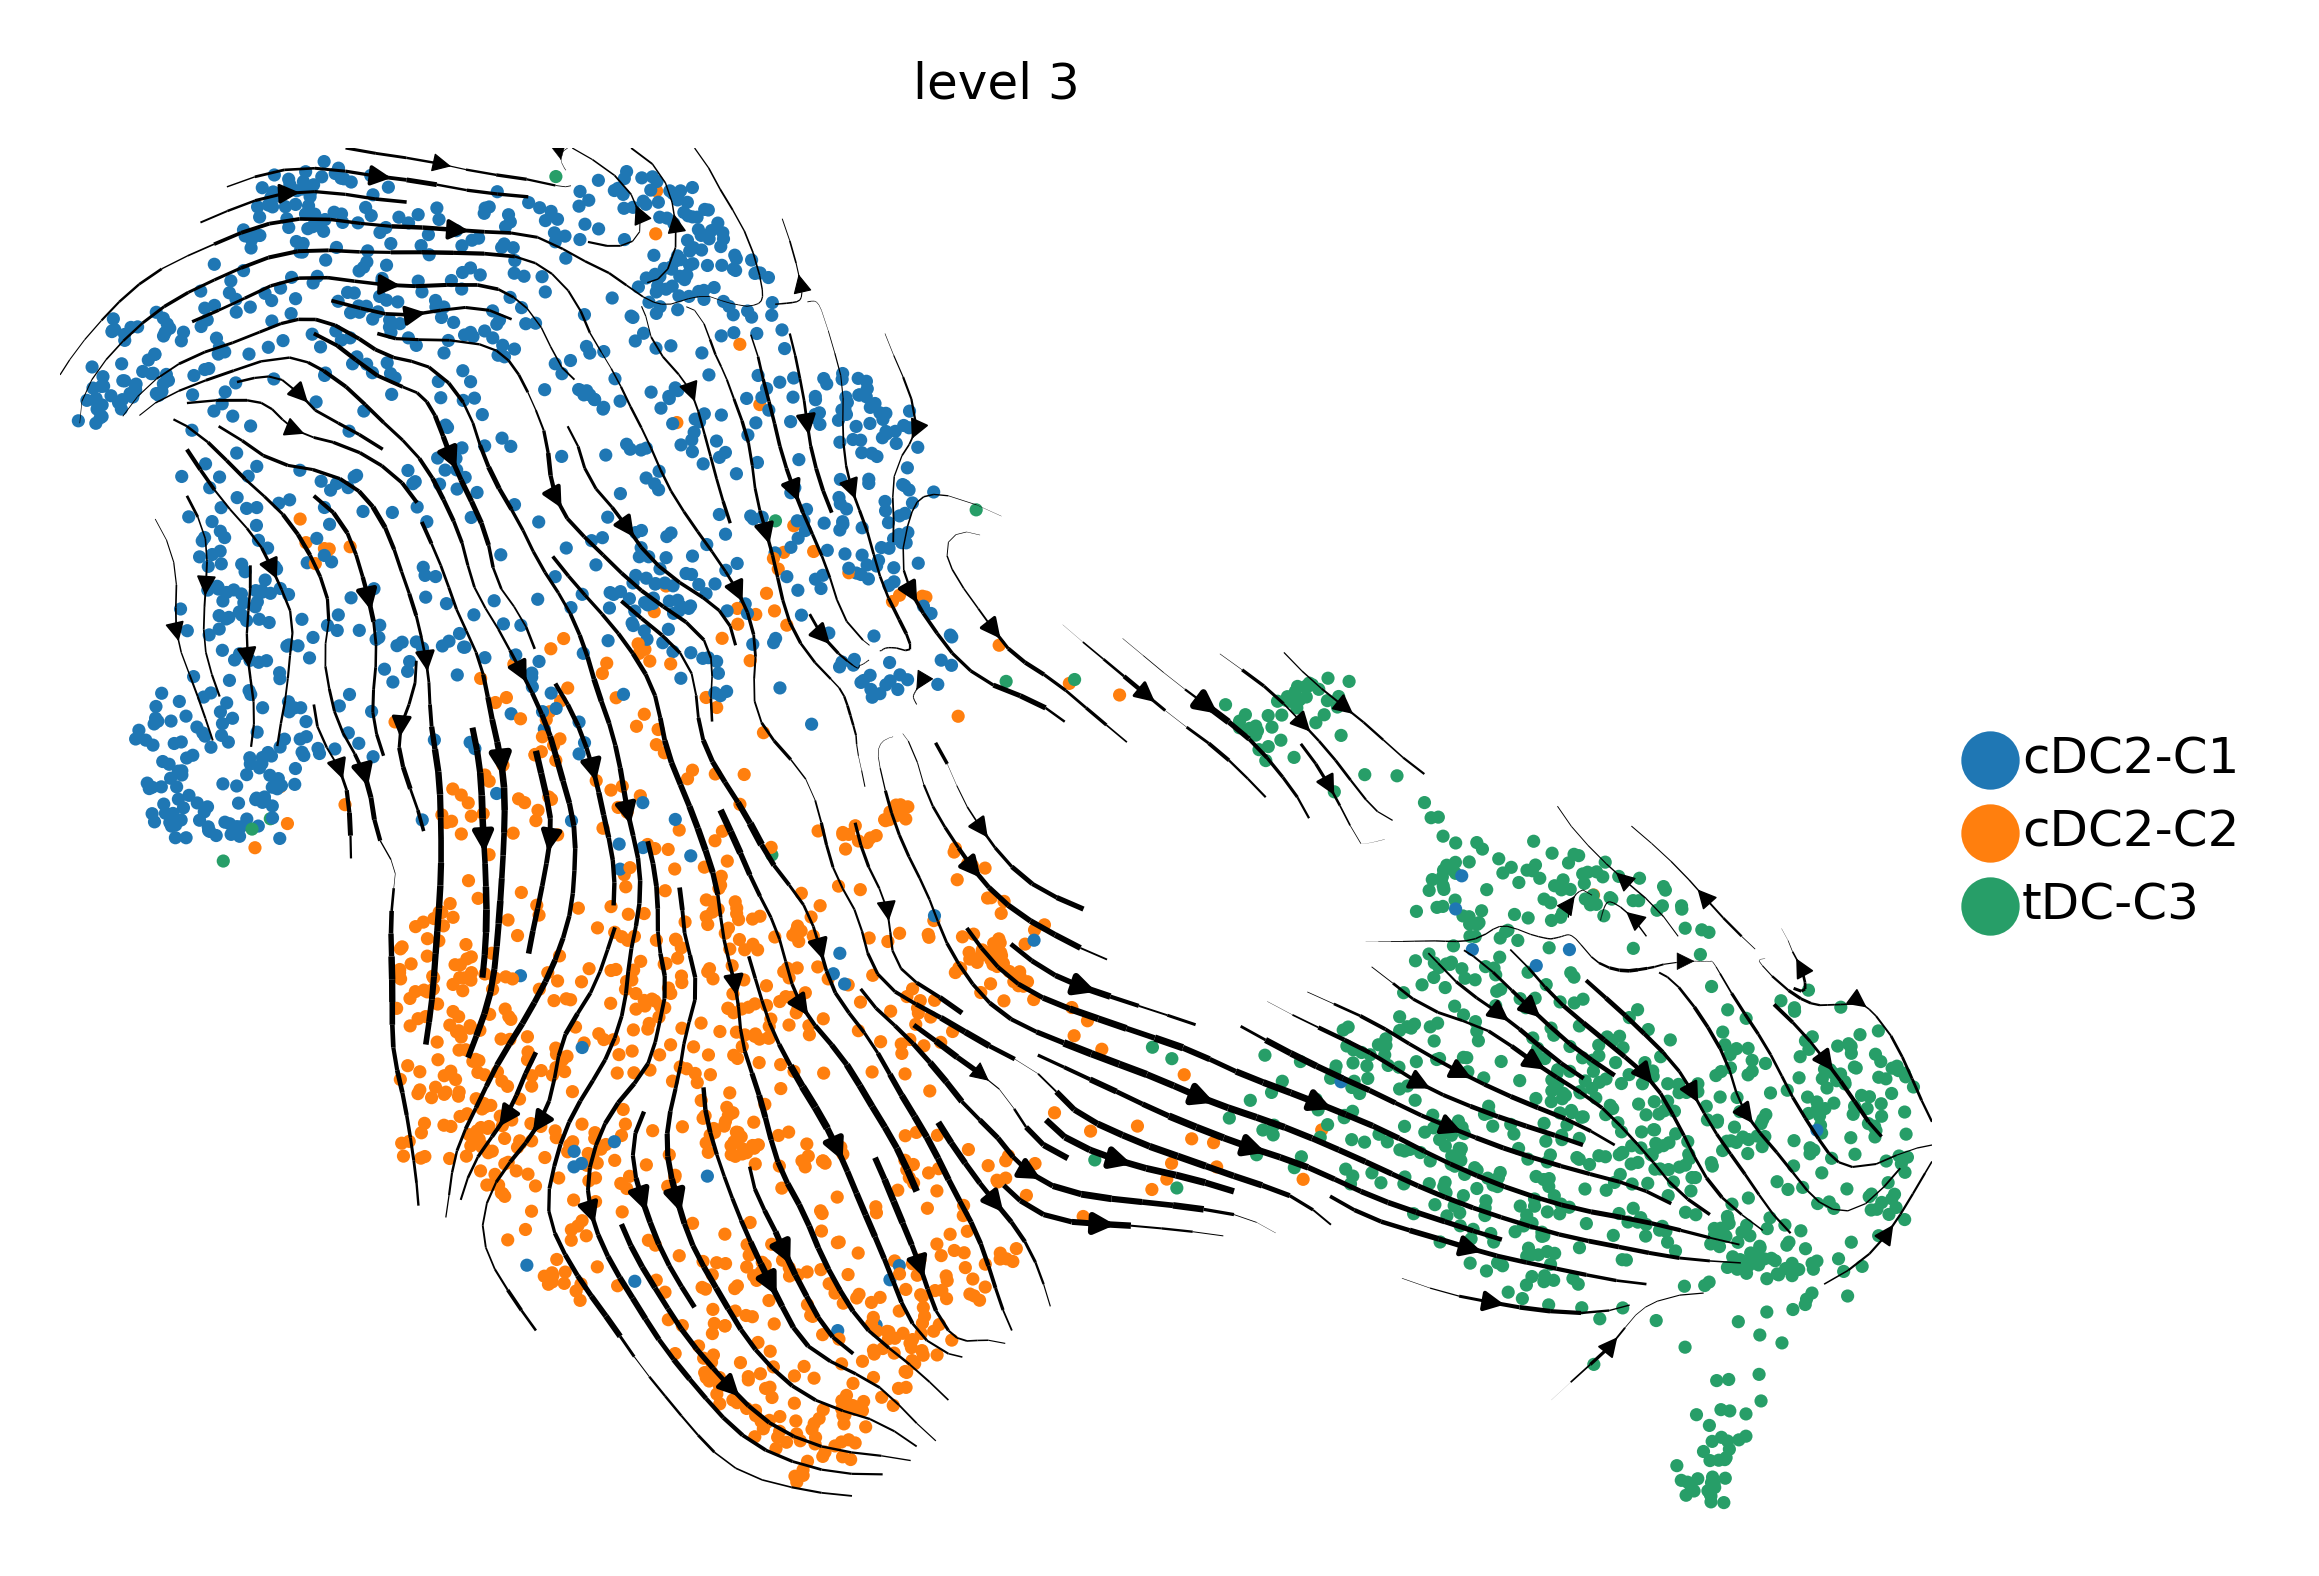

In [8]:
scv.pl.velocity_embedding_stream(vdata, basis='umap', color=['level_3'], linewidth = 0.5, arrow_size=0.5, arrow_color='black', legend_loc='right',
                              figsize=(4, 3), alpha=1, dpi=300, fontsize=6, legend_fontsize=6, size = 10, save=f"{cell}.scvelo_{model}.on_stream.pdf")

# steady_state model 

In [9]:
model = "steady"

In [10]:
scv.tl.velocity(vdata, mode='steady_state')
scv.tl.velocity_graph(vdata)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/64 cores)


  0%|          | 0/2614 [00:00<?, ?cells/s]

    finished (0:00:04) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_cDC2_tDC.scvelo_steady.on_grid.pdf


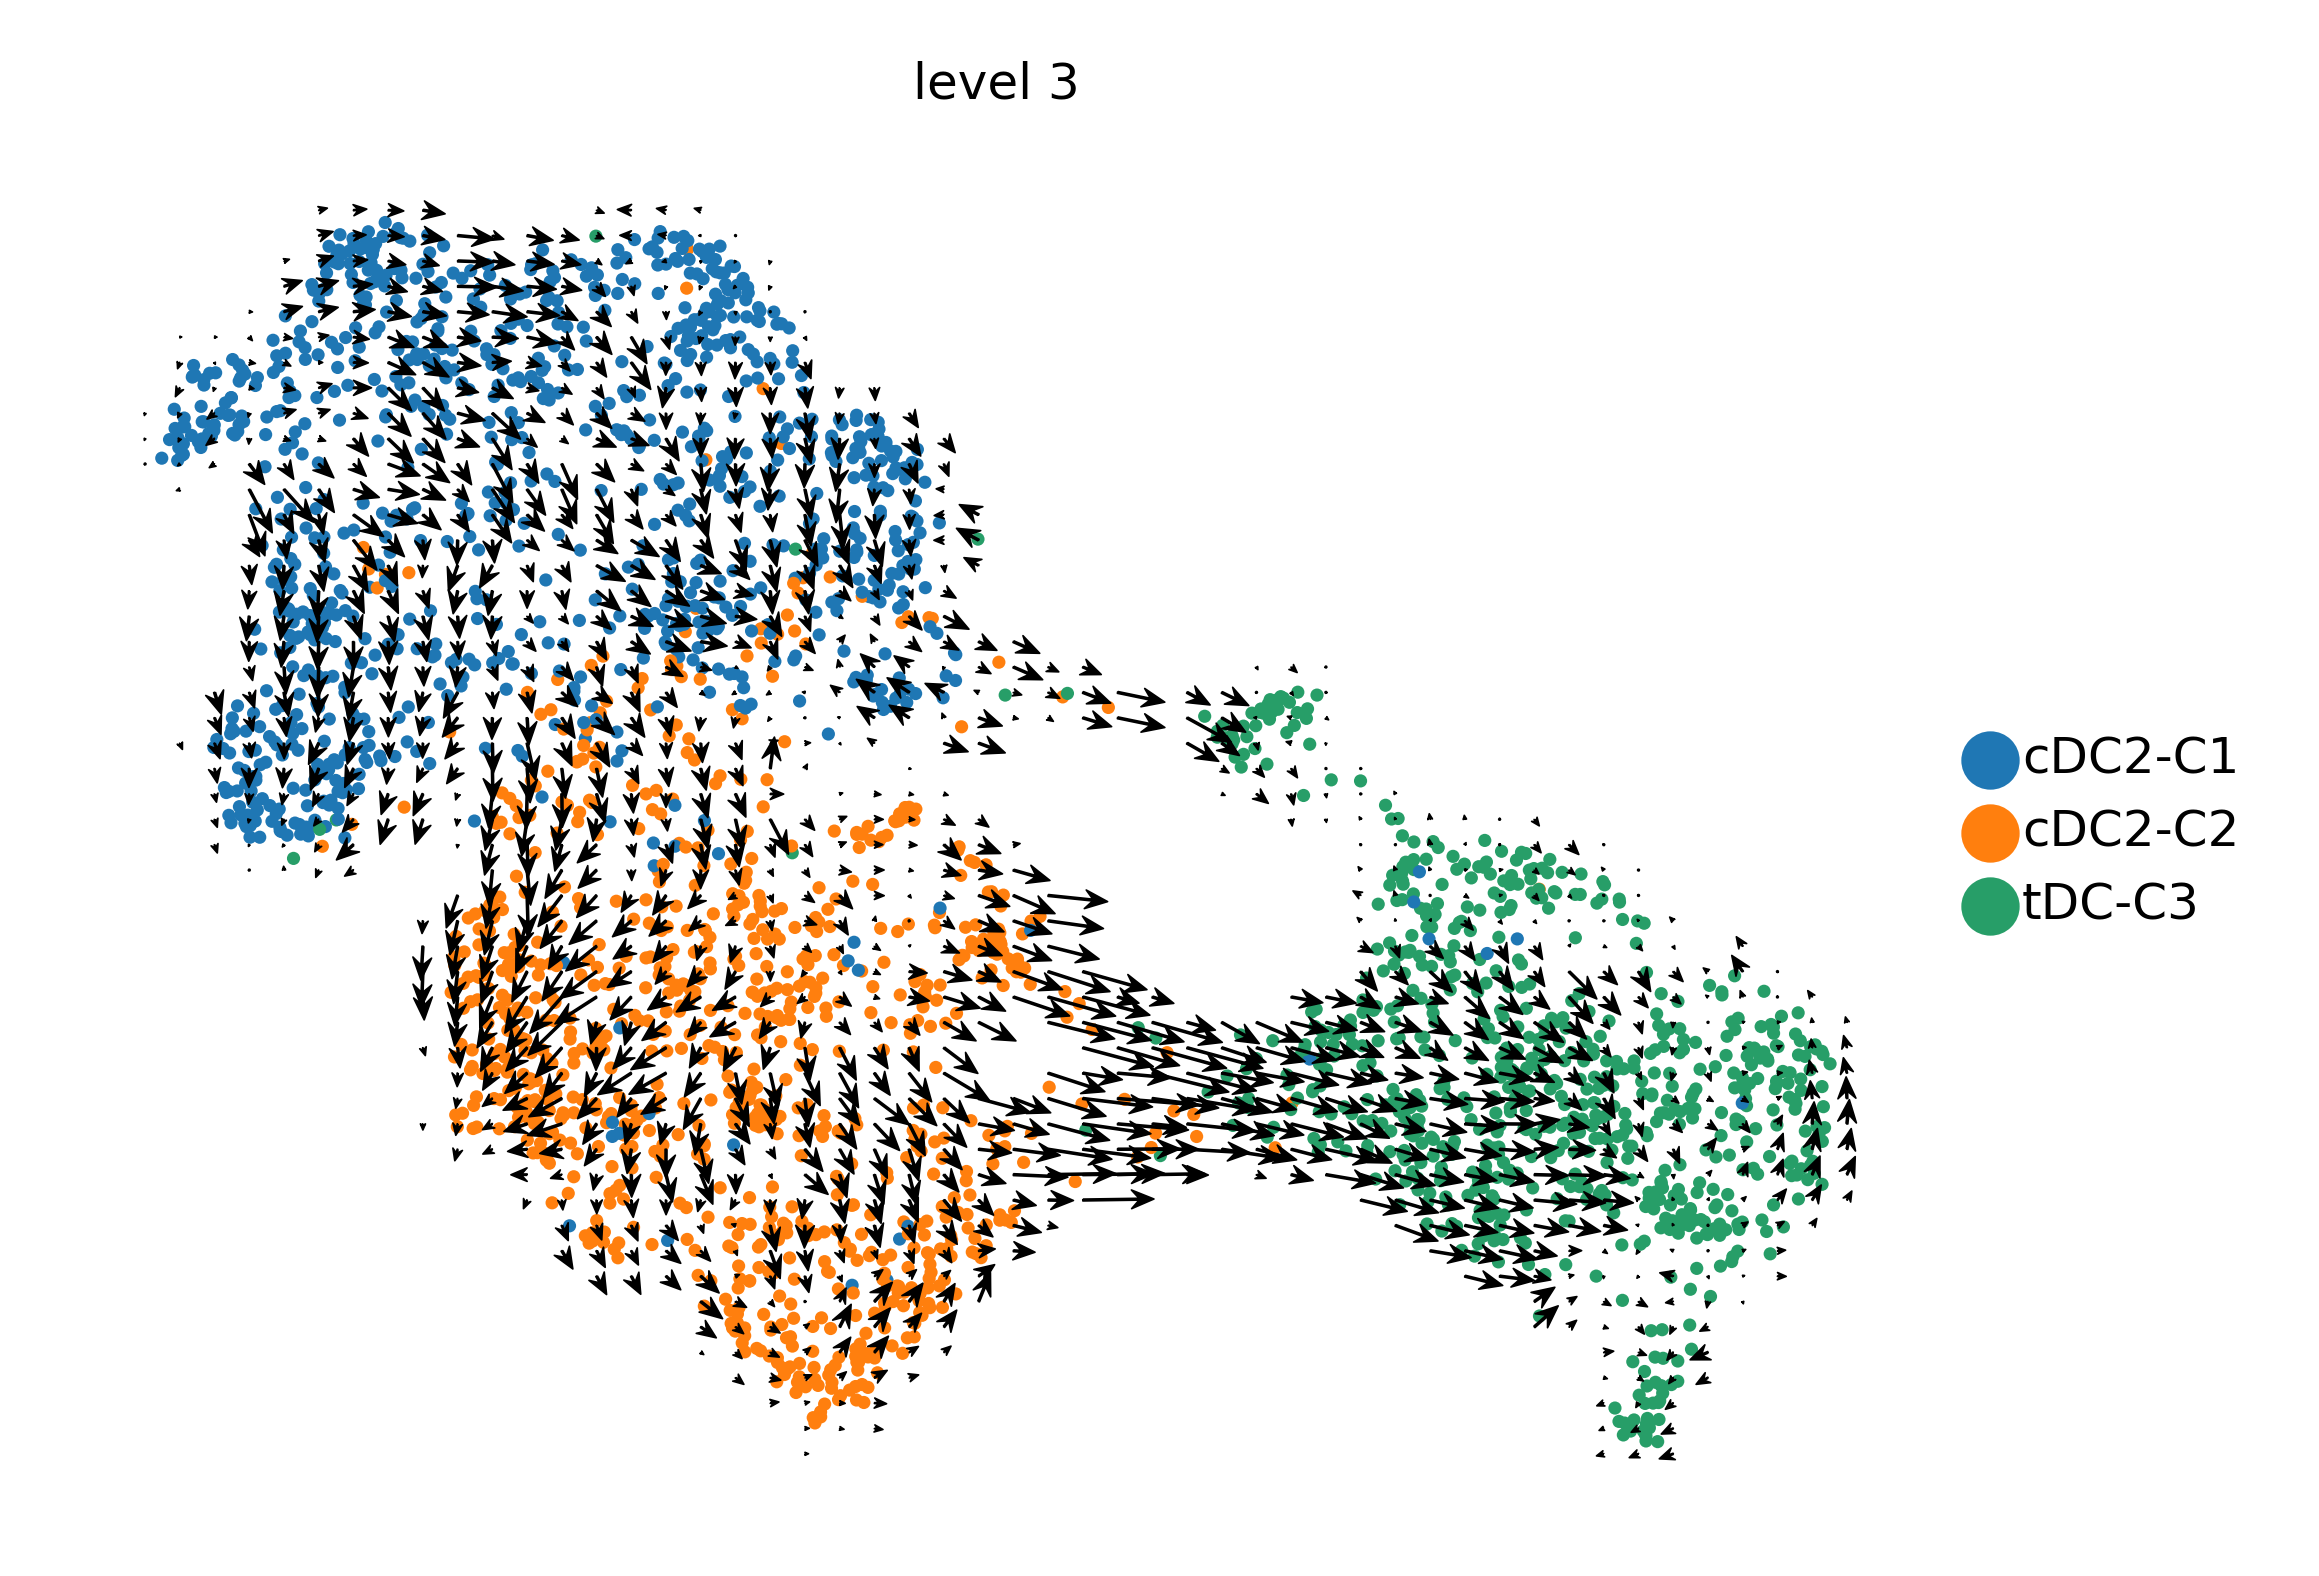

In [11]:
scv.pl.velocity_embedding_grid(vdata, basis='umap', color=['level_3'], arrow_size=2, arrow_length=2, arrow_color='black', legend_loc='right',
                              figsize=(4, 3), alpha=1, dpi=300, fontsize=6, legend_fontsize=6, size = 10, save=f"{cell}.scvelo_{model}.on_grid.pdf")

saving figure to file ./figures/scvelo_cDC2_tDC.scvelo_steady.on_stream.pdf


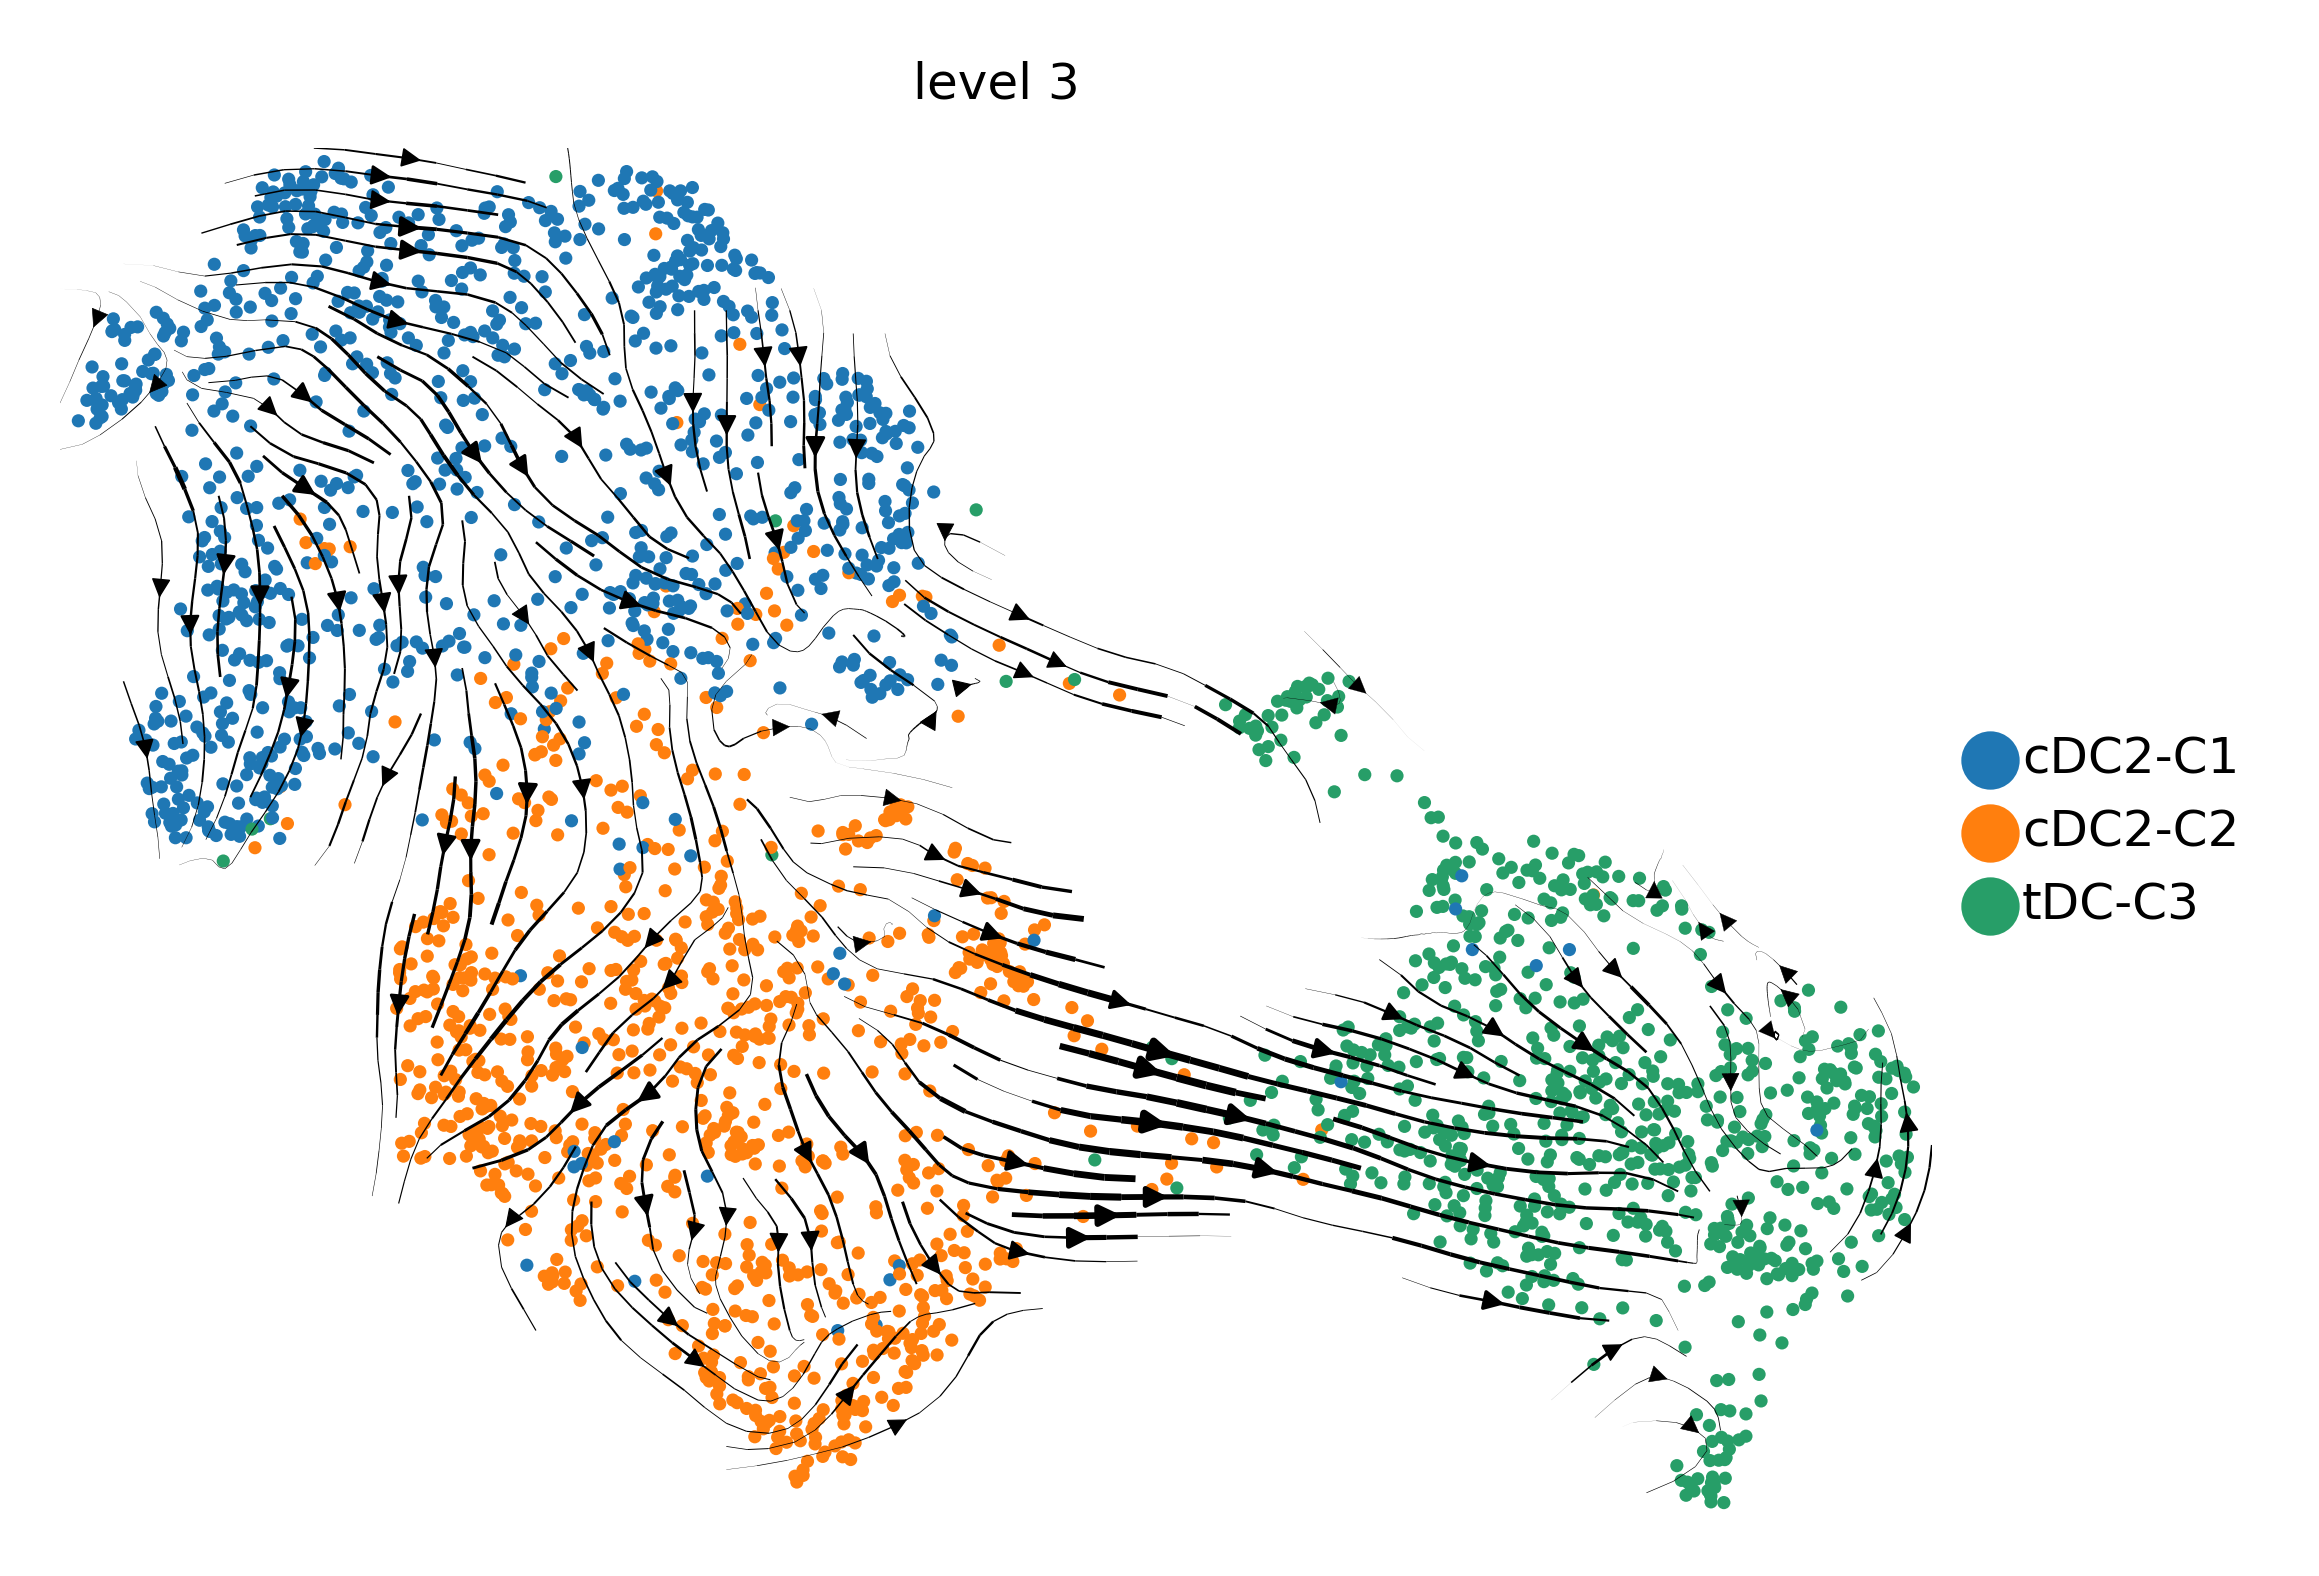

In [12]:
scv.pl.velocity_embedding_stream(vdata, basis='umap', color=['level_3'], linewidth = 0.5, arrow_size=0.5, arrow_color='black', legend_loc='right',
                              figsize=(4, 3), alpha=1, dpi=300, fontsize=6, legend_fontsize=6, size = 10, save=f"{cell}.scvelo_{model}.on_stream.pdf")

# dynamical model

In [13]:
model = "dynamical"

In [14]:
scv.tl.recover_dynamics(vdata, n_jobs=12)
scv.tl.velocity(vdata, mode='dynamical')
scv.tl.velocity_graph(vdata)

recovering dynamics (using 12/64 cores)


  0%|          | 0/921 [00:00<?, ?gene/s]

    finished (0:00:37) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/64 cores)


  0%|          | 0/2614 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_cDC2_tDC.scvelo_dynamical.on_grid.pdf


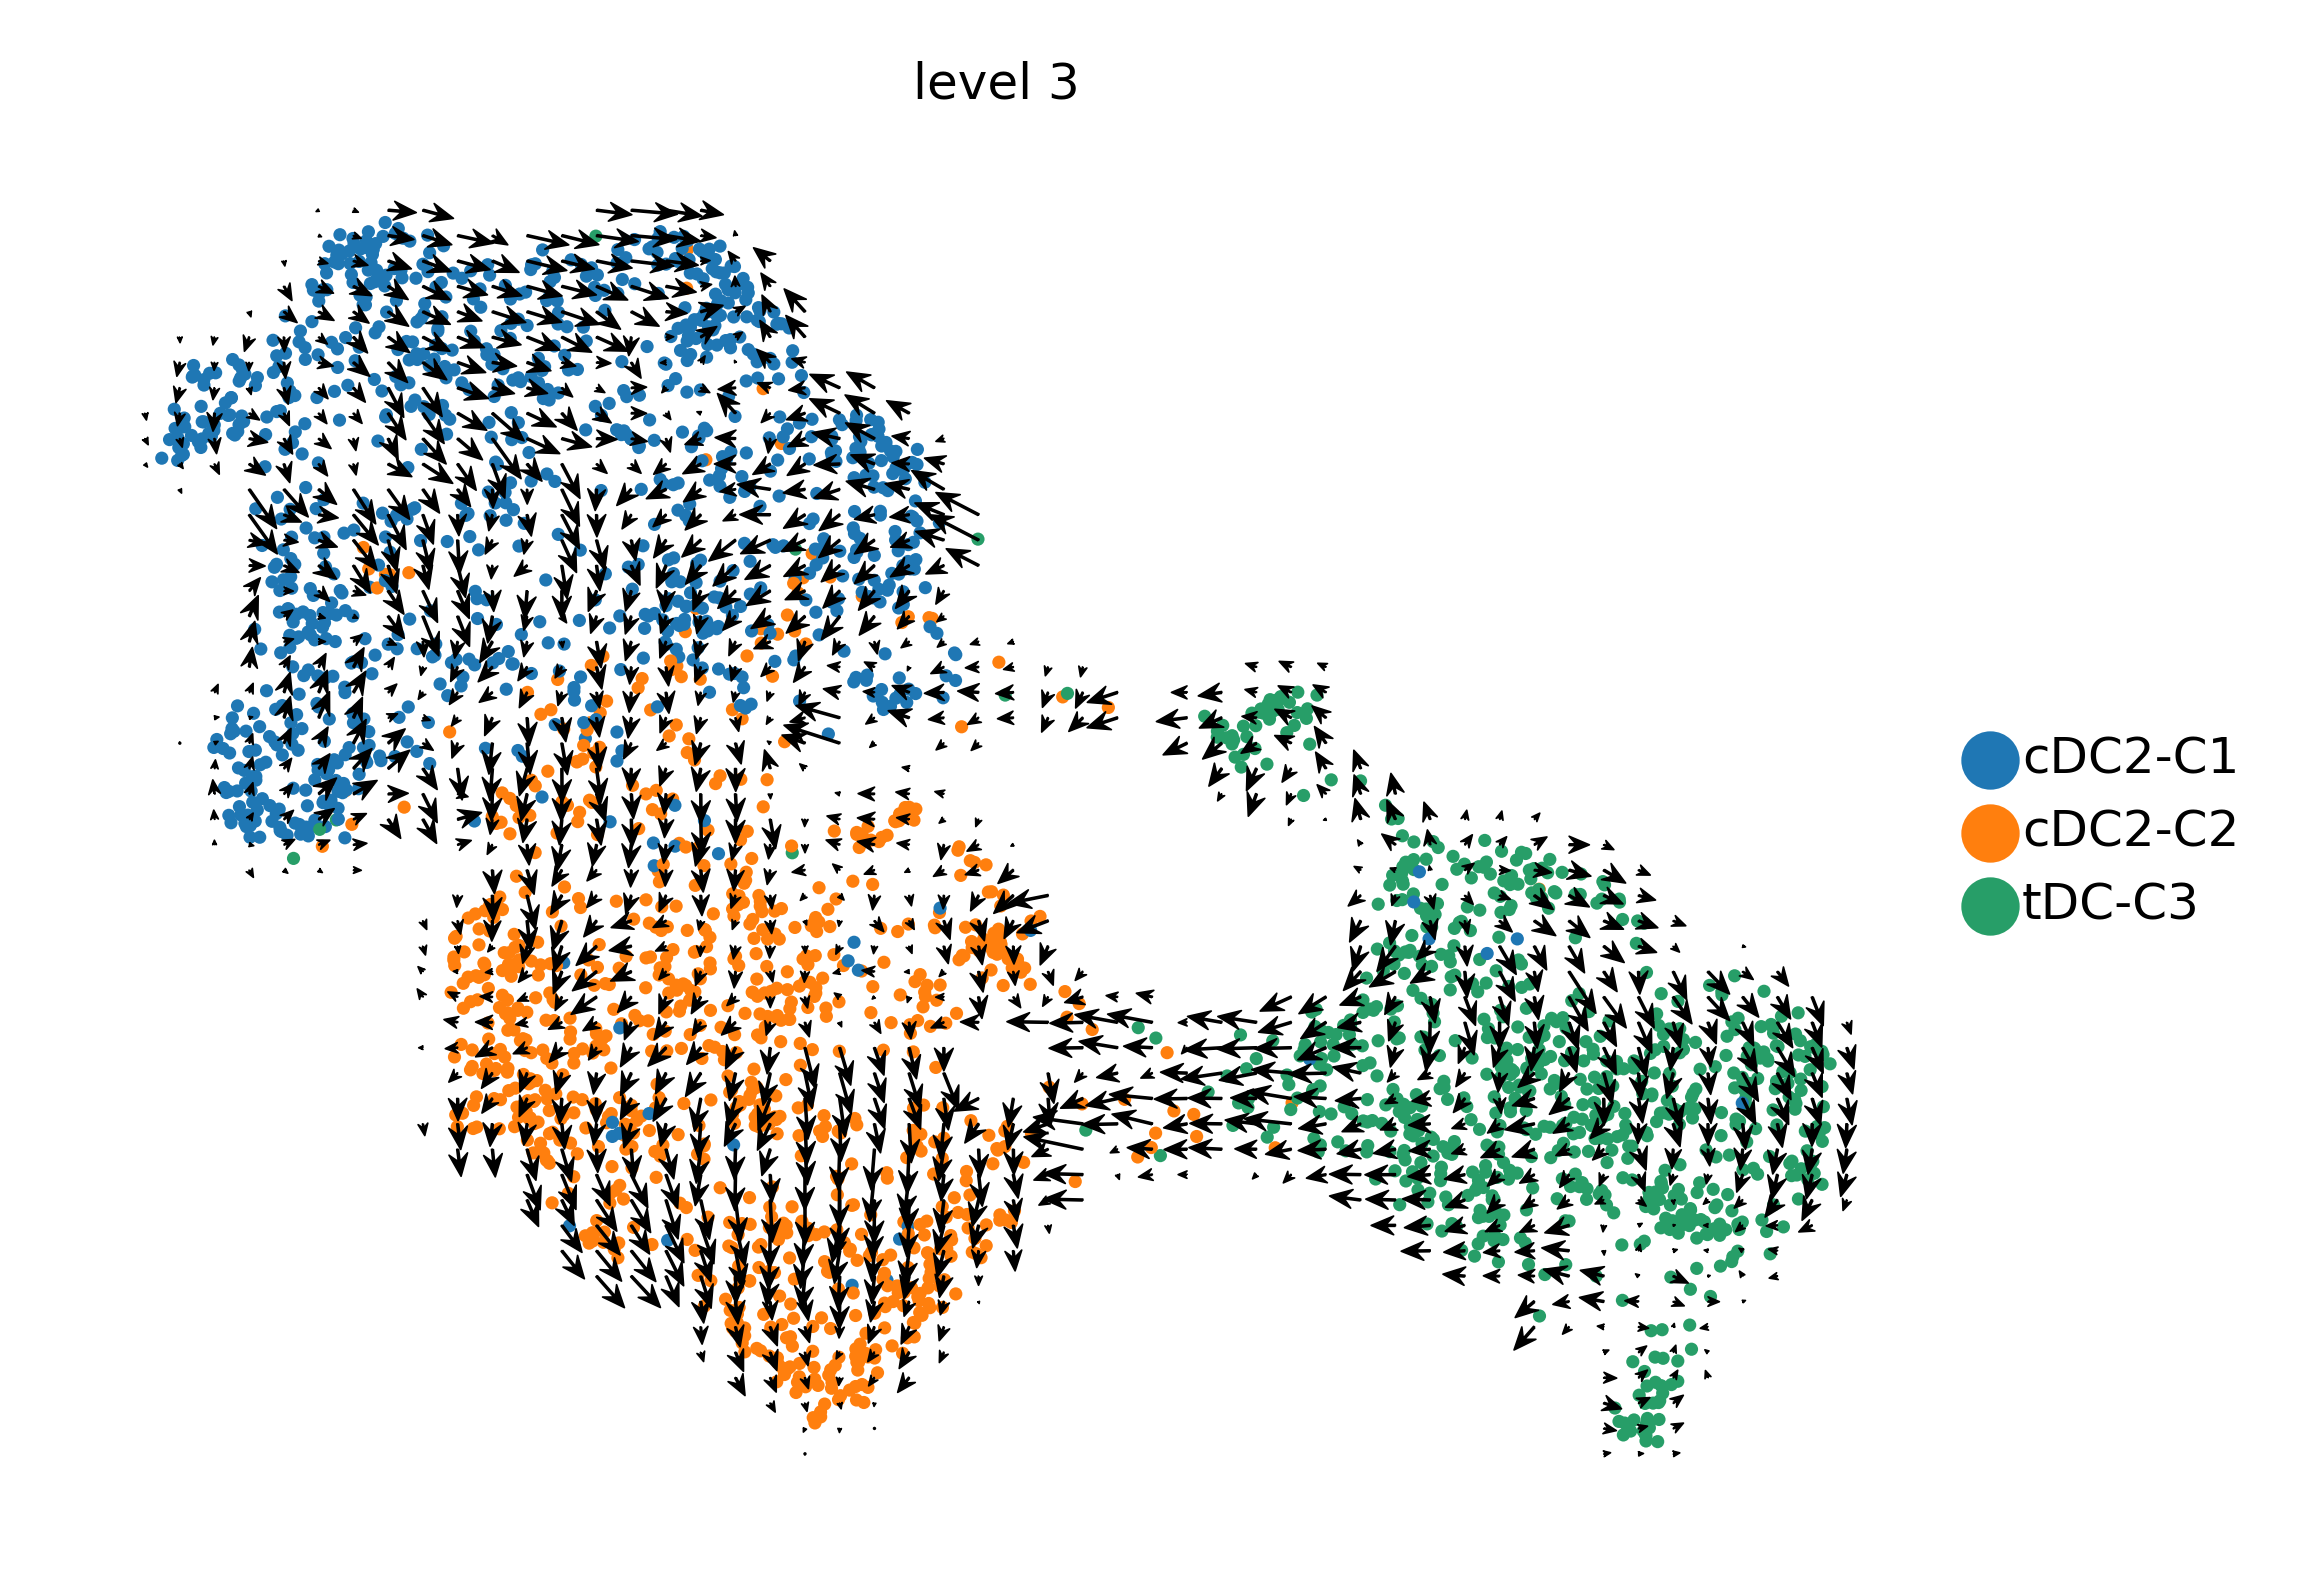

In [15]:
scv.pl.velocity_embedding_grid(vdata, basis='umap', color=['level_3'], arrow_size=2, arrow_length=2, arrow_color='black', legend_loc='right',
                              figsize=(4, 3), alpha=1, dpi=300, fontsize=6, legend_fontsize=6, size = 10, save=f"{cell}.scvelo_{model}.on_grid.pdf")

saving figure to file ./figures/scvelo_cDC2_tDC.scvelo_dynamical.on_stream.pdf


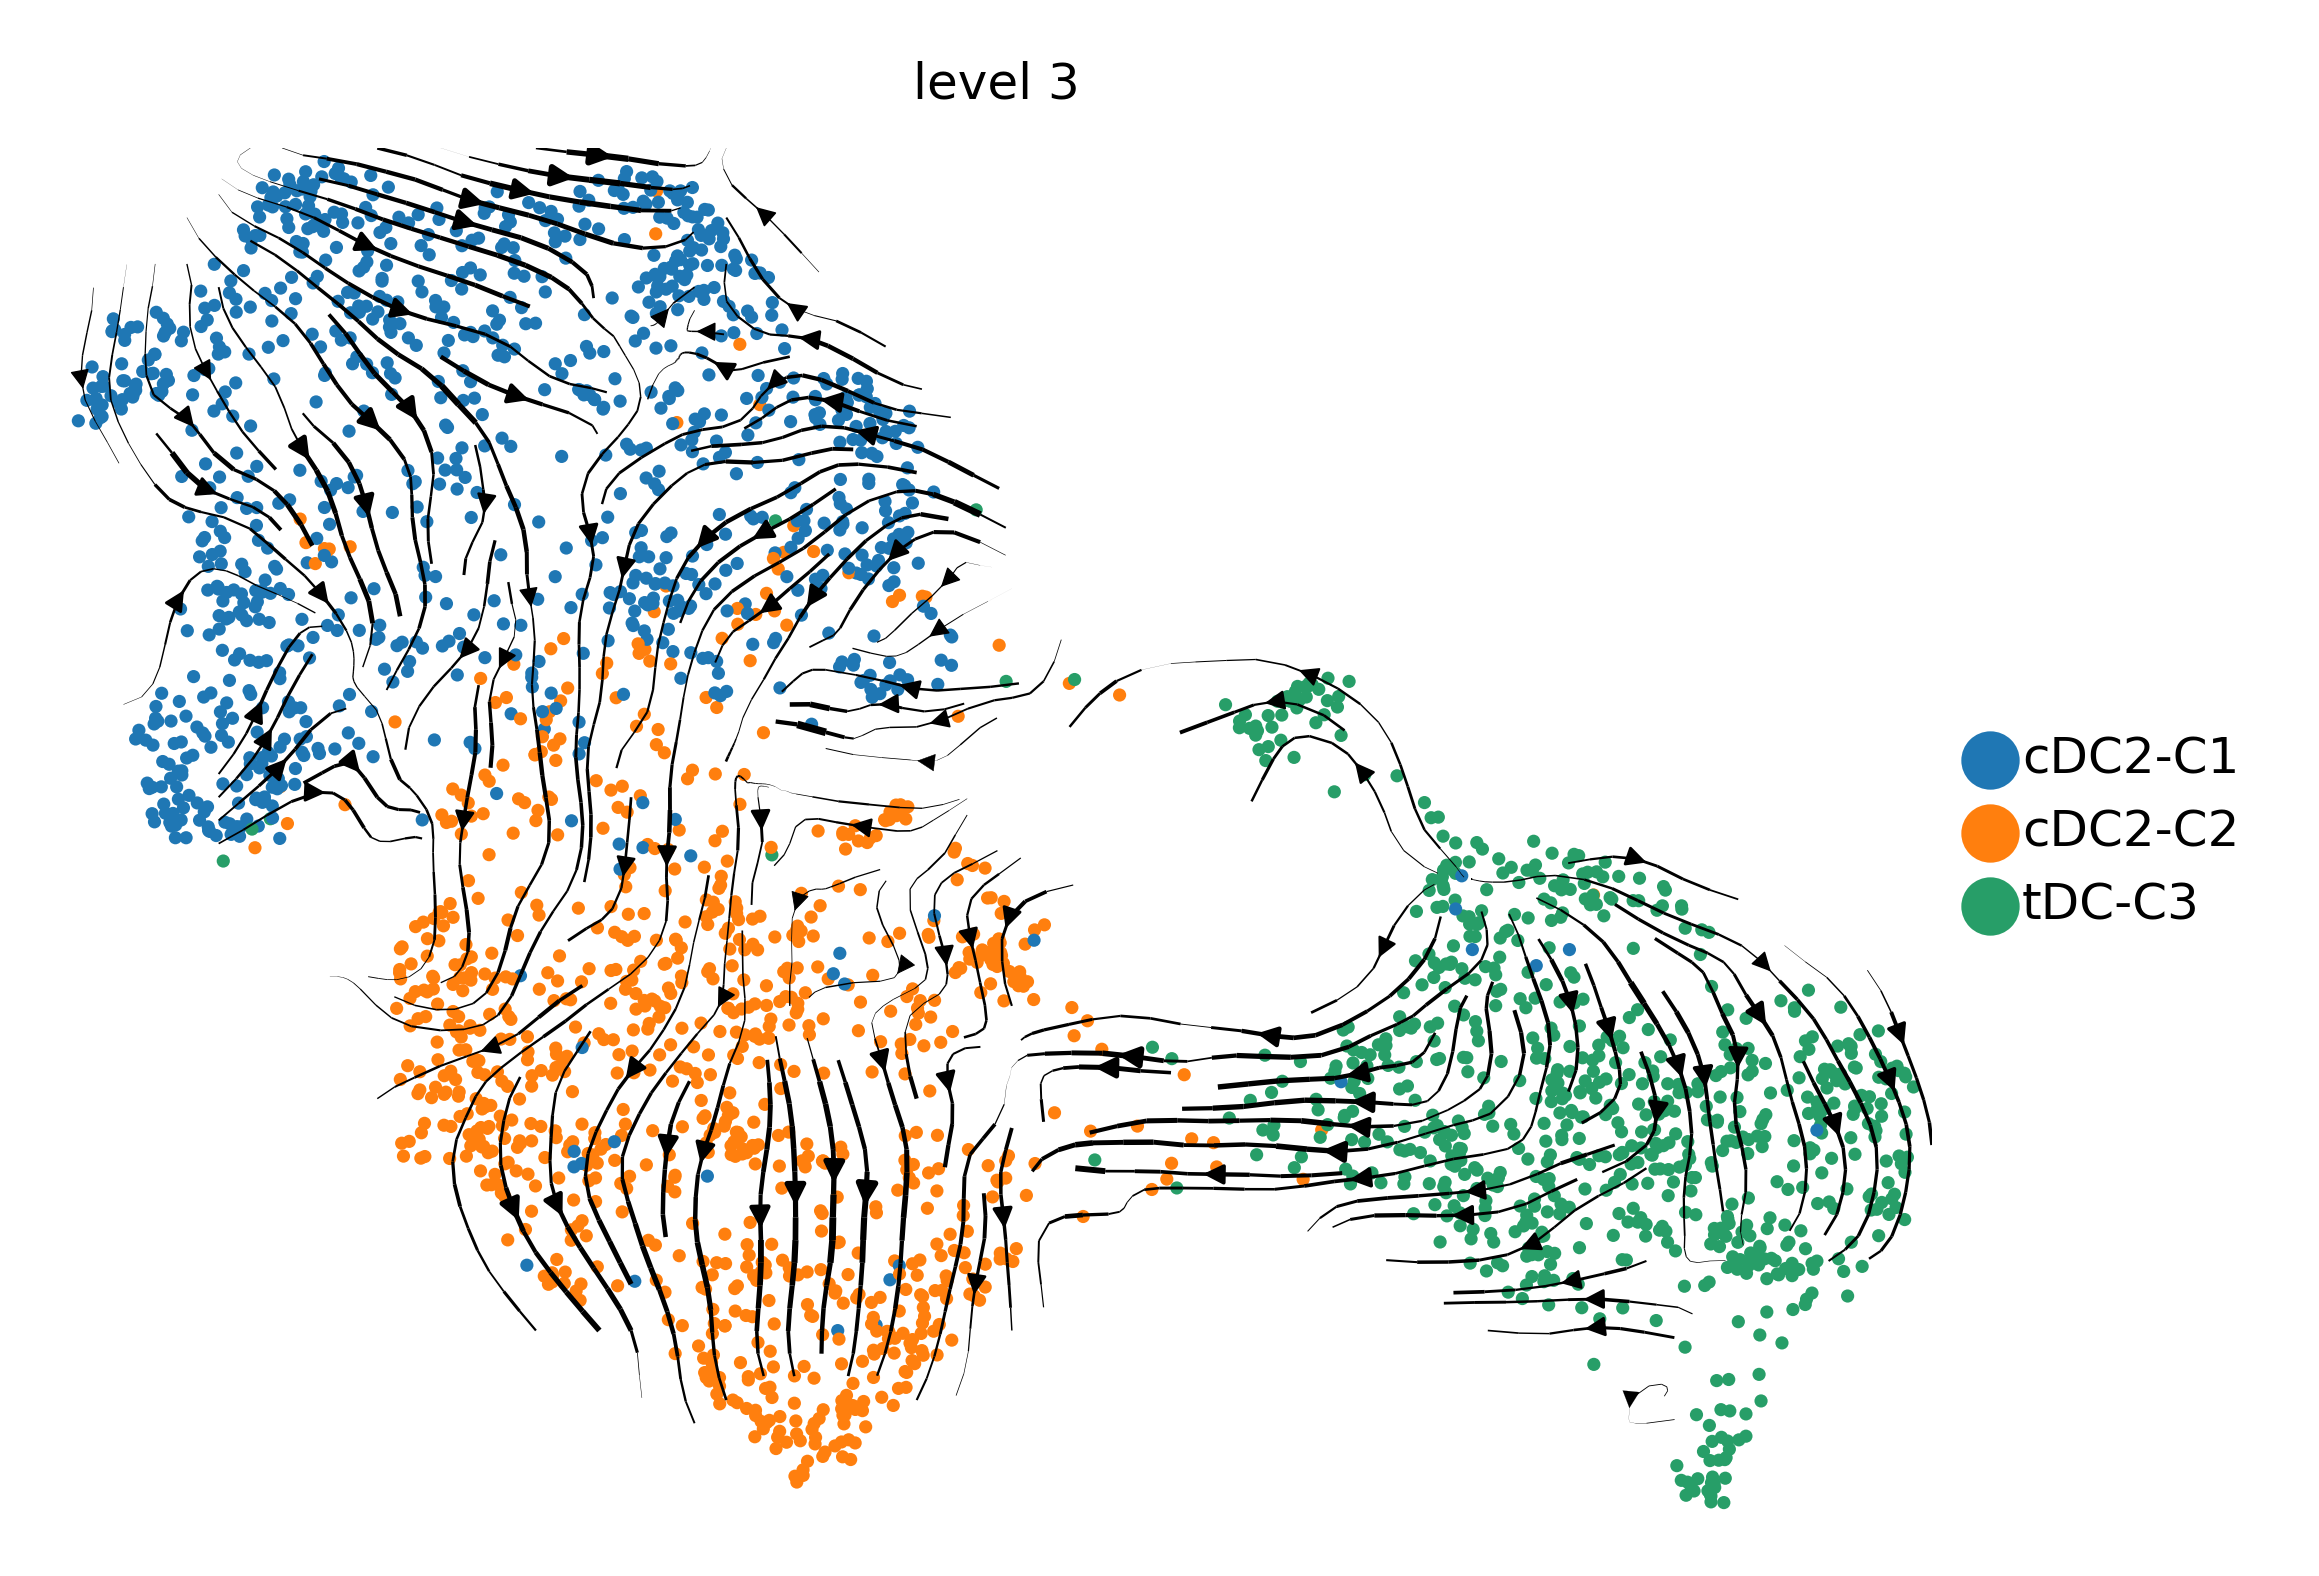

In [16]:
scv.pl.velocity_embedding_stream(vdata, basis='umap', color=['level_3'], linewidth = 0.5, arrow_size=0.5, arrow_color='black', legend_loc='right',
                              figsize=(4, 3), alpha=1, dpi=300, fontsize=6, legend_fontsize=6, size = 10, save=f"{cell}.scvelo_{model}.on_stream.pdf")